In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeOp-tech/DA-ML-Regression-Inference/master/datasets/scores_synth.csv?token=AHM3F3CTVHB7EXOP2QEU5MLAOWN7A")
print(data.shape)
data.head()

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1


Text(0.5, 0, 'income (in 1k euros)')

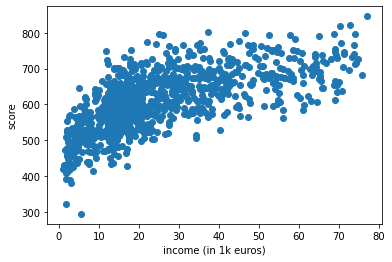

In [7]:
plt.scatter(data['income'], data['score'])
plt.ylabel('score')
plt.xlabel('income (in 1k euros)')

Let's draw a linear line across this scatter plot. 

In other words,
$$ y=f(x)=a+b*x$$
$$score = f(income)=a+b*income$$

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[['income']], data['score'])

LinearRegression()

In [14]:
print('a is',lr.intercept_)
print('b is', lr.coef_)

a is 530.8912321292064
b is [3.1267463]


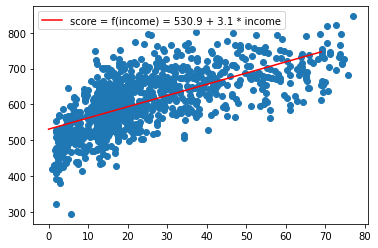

In [21]:
regression_function = lr.intercept_ + lr.coef_ * np.arange(70)
plt.scatter(data['income'], data['score'])
plt.plot(regression_function, color='r', 
         label=f'score = f(income) = {round(lr.intercept_, 1)} + {round(lr.coef_[0], 1)} * income')
plt.legend()

## Inference

One of the reasons why **linear regressions** are very popular despite its restrictive assumption on the functional form is due to their simplcity and **interpretability**. We will see how to treat non-linear relationships with a linear model in the next class.

 
Going back to the formulation: 
$$ y=f(x)=a+b*x$$
$$score = f(income)=a+b*income$$


How do we interpret this function?

In [22]:
from statsmodels.api import OLS
data['intercept'] = 1
ols = OLS(data['score'], data[['intercept', 'income']])
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     752.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          5.97e-124
Time:                        15:38:20   Log-Likelihood:                -5545.3
No. Observations:                1000   AIC:                         1.109e+04
Df Residuals:                     998   BIC:                         1.110e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    530.8912      3.471    152.945      0.000     524.080     537.703
income         3.1267      0.114     27.437      0.000       2.903       3.350
==============================================================================
Omnibus:                        0.112   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.052
Skew:                          -0.008   Prob(JB):                        0.974
Kurtosis:                       3.032   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient
It's actually very simple... The impact of a variable in a linear model is constant across different values of that variable. Hence, we can state that for every 1.000 euro increase on students income we get on average (expectation) an increase of 4 points in score. Look again... do you see any issue with that 'functionality' of linear regression?

#### P_value: how accurate is the coefficient? 
The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

#### Is the error term, or $\epsilon$, random?

Text(0.5, 0, 'fitted score')

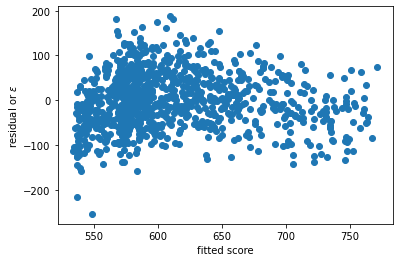

In [26]:
plt.scatter(results.fittedvalues, results.resid)
plt.ylabel('residual or $\epsilon$ ')
plt.xlabel('fitted score')

#### Is the error term, or $\epsilon$, normal?

(array([  2.,   0.,  19.,  91., 177., 291., 225., 138.,  46.,  11.]),
 array([-253.77299971, -209.63826844, -165.50353716, -121.36880589,
         -77.23407461,  -33.09934334,   11.03538794,   55.17011921,
          99.30485049,  143.43958176,  187.57431304]),
 <BarContainer object of 10 artists>)

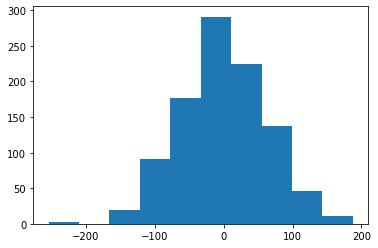

In [27]:
plt.hist(results.resid)